In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/Users/ambershen/Desktop/linARG/dx_analysis/figures/4b/data/matmat_times.csv')
n_vectors = [1, 2, 10, 20, 40, 60, 80, 100]
df['n_vectors'] = np.repeat(n_vectors, df.shape[0]/len(n_vectors))

res = pd.DataFrame(columns=['chr', 'method', 'n_vectors', 'matmat_time', 'matmat_peak_memory'])

for method in ['grg', 'linarg']:
        for n_vector in n_vectors:      
            df_filt = df[(df['method'].str.startswith(method)) & (df.n_vectors==n_vector)]
            
            matmat_time = np.sum(df_filt['matmat_time (s)']) + np.sum(df_filt['load_time (s)'])
            matmat_peak_memory = np.sum(df_filt['matmat_memory (MB)'])
            
            res.loc[res.shape[0]] = ['1_11_21', method, n_vector, matmat_time, matmat_peak_memory]

for n_vector in [1, 2, 10, 20, 40, 60, 80, 100]:
    time = 0
    memory = 0
    for chrom in [1, 11, 21]:
        df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4b/data/plink_matmat_chr{chrom}_{n_vector}.csv')
        time += df.wall_time_seconds[0]
        memory += df.peak_memory_MB[0]
    res.loc[res.shape[0]] = ['1_11_21', 'plink2', n_vector, time, memory]
    
    
xsi_vector_time = 0
for chrom in [1, 11, 21]:
    df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4a/data/dot_product_xsi_chr{chrom}.csv')
    xsi_vector_time += np.mean(df.wall_time_seconds)

for n_vector in [1, 2, 10, 20, 40, 60, 80, 100]:
    res.loc[res.shape[0]] = ['1_11_21', 'xsi', n_vector, xsi_vector_time*n_vector, None]


/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_35800/3060298280.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res.loc[res.shape[0]] = ['1_11_21', 'xsi', n_vector, xsi_vector_time*n_vector, None]
/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_35800/3060298280.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res.loc[res.shape[0]] = ['1_11_21', 'xsi', n_vector, xsi_vector_time*n_vector, None]
/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_35800/3060298

In [26]:
res

,chr,method,n_vectors,matmat_time,matmat_peak_memory
0,1_11_21,grg,1,410.032644,40975.686719
1,1_11_21,grg,2,394.954234,43992.666406
2,1_11_21,grg,10,512.851715,67642.330469
3,1_11_21,grg,20,570.827289,97424.081250
4,1_11_21,grg,40,762.485878,156764.251562
5,1_11_21,grg,60,925.163588,216104.455469
6,1_11_21,grg,80,1151.407643,275444.661719
7,1_11_21,grg,100,1198.380513,334785.102344
8,1_11_21,linarg,1,82.802644,36776.563281
9,1_11_21,linarg,2,91.723190,37658.042188


In [27]:

for method in ['xsi', 'plink2', 'grg']:
    print(method)
    ratios = np.array(res[res.method==method].matmat_time) / np.array(res[res.method=='linarg'].matmat_time)
    print(ratios)
    print(np.min(ratios))
    print(np.max(ratios))

xsi
[ 22.16975095  40.02726023 126.02519318 231.88001014 352.22867115
 411.27585625 525.07036457 552.40561985]
22.16975094641623
552.4056198502898
plink2
[5.44958442 3.09779893 2.3443926  2.63059341 3.10881596 3.65523475
 4.72887229 5.06279185]
2.3443926025202657
5.449584421680534
grg
[4.95192693 4.30593652 3.52082277 3.60523038 3.65756032 3.45458177
 4.11672264 3.60618337]
3.4545817688267766
4.951926929792843


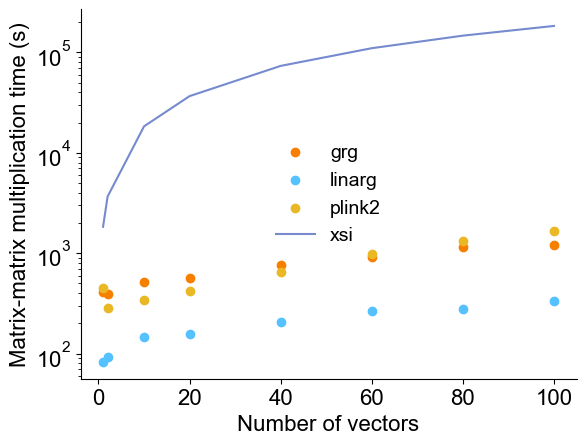

In [32]:
color_map = {
    'grg': '#F77F00', # orange
    'linarg': '#56C1FF', # blue
    'plink2': '#e9b824', # yellow
    'xsi': '#758acf', # purple
    'plink1.9': '#93c47d', # green   
}

plt.rcParams['font.family'] = 'Arial'

for method in ['grg', 'linarg', 'plink2', 'xsi']:
    df_filt = res[(res['method'].str.startswith(method))]
    if method != 'xsi':
        plt.scatter(df_filt.n_vectors, df_filt.matmat_time, label=method, color=color_map[method])
    else:
        plt.plot(df_filt.n_vectors, df_filt.matmat_time, label=method, color=color_map[method])
plt.legend()
plt.yscale('log')
plt.xlabel('Number of vectors', fontsize=16)
plt.ylabel('Matrix-matrix multiplication time (s)', fontsize=16)
plt.legend(frameon=False, fontsize=14)
plt.tick_params(axis='both', labelsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()